# С какими данными работаем и их предобработка 

In [2]:
# Имопртируем необходимые нам библиотеки 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly
import plotly.express as px

# Читаем и затем проверяем полученный DataFrame
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [3]:
exited = churn_data['Exited'].value_counts() # Считаем количество значений среди ушедших и лояльных клиентов банка 

# Создаём круговую диаграмму, значениями которой будет количество ушедших клиентов и лояльных, а значениями легенды - индексы столбца 'Exited'
fig = px.pie(exited,
values=exited,
names=exited.index,
title='Cоотношение ушедших и лояльных клиентов')

fig.show() # Отображаем диаграмму

## Таким образом, мы можем наблюдать большой отток клиентов, практически четверть, от общего числа всех имеющихся у нас клиентов!

## В свою очередь, это говорит об необходимости в дополнительных наблюдениях для выяления причин столь обильного оттока клиентов и разработке в дальнейшем стратегии по увеличению доли лояльных клиентов. 

# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [4]:
balance_data = churn_data[churn_data['Balance'] > 2500] # Сортируем наш DF по клиентам, чья сумма денежных средств на счетах более 2500 USD

# Создаём гистограмму, осью Ox которой будет баланс клиентов, а осью Oу колличество наблюдений.
fig = px.histogram(churn_data,
x="Balance",
title='Распределение баланса пользователей',
color='Exited') # Так же дополнительно окрашиваем график в соотвествии с лояльностью клиента для наблюдения их ситуацией на счетах  

fig.show() # Отображаем гистограмму

## Как мы можем видеть, подавляющая часть лояльных и ушедших клиентов имеют/ли на своих счетах суммы в менее, чем 5000 USD. Это может говорить о том, что огромное колличество клиентов не готовы хранить большие суммы на своих счетах в данном банке.

## Причина подобного может скрываться как в возрасте самого банка на рынке и его условий/предложений/продуктов, так и банальной клиентоориентированностью на привлечение малоимущих граждан. Всё это требует дополнительных данных.

# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [5]:
# Создаём диаграмму размаха, осью Ox которой будет лояльность клиентов, а осью Oу размах их баланса.
fig = px.box(churn_data,
y='Balance',
x='Exited',
color='Exited',
title='Распределение баланса клиента в разрезе признака оттока') # Окрашиваем диаграмму в соотвествии с лояльностью группы 

fig.show() # Отображаем диаграмму размаха

## На данной диаграмме мы отчётливо видим, что ушедшие клиенты имели на своих счетах бОльшие суммы, нежели лояльные - это видно по показателям q1, q3, median и max.

## Это указываем нам на то, что на тот период предложения банка привлекали более состоятельных граждан на хранения своих накоплений, их сохранность и прочие условия наподобие годовых на остаток по счёту. Но это лишь догатки, развять или утвердить которые могут лишь дополнительные данные о дате добавления клиентов в базу данных банка и имеющихся на тот момент предложений и услуг последнего

# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [6]:
# Создаём диаграмму размаха, осью Ox которой будет лояльность клиентов, а осью Oу размах их возраста.
fig = px.box(churn_data,
y='Age',
x='Exited',
color='Exited',
title='Распределение возраста клиентов в разрезе признака оттока') # Окрашиваем диаграмму в соотвествии с лояльностью группы 

fig.show() # Отображаем диаграмму размаха

## Как видно, больше потенциальных выбросов находиться в категории лояльных клиентов, возрастом старше 56 лет.

## Стоит обратить внимания и дополнительно разобрать именно эту возрастную категорию, так как причина может скрываться как в сбое работы в системе добавления клиента в базу и человеческий фактор, так и в случайности и уникальных явлениях (Возраст: 85, 88 и 92)

# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

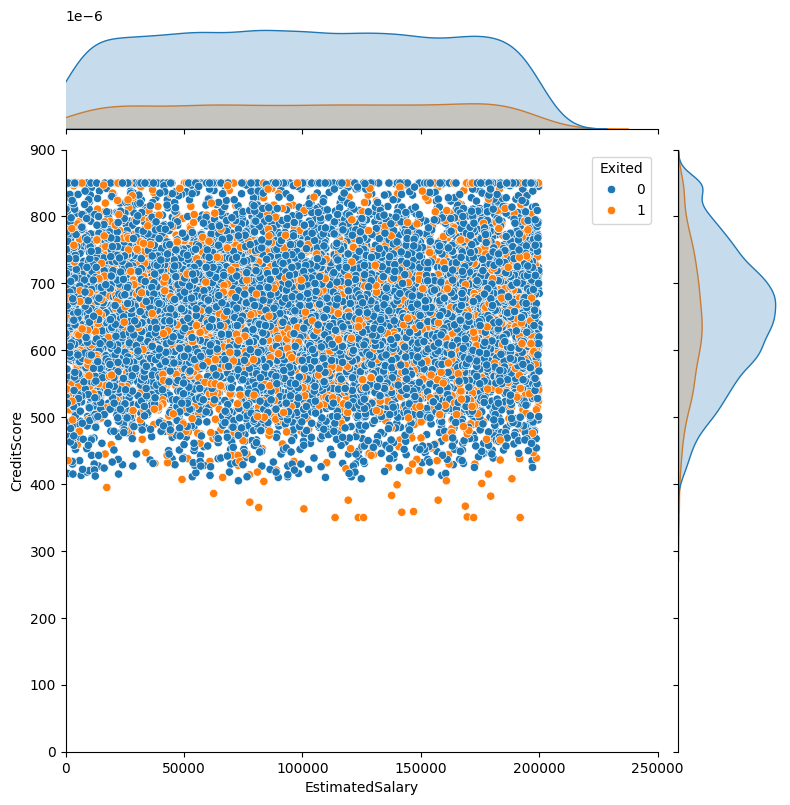

In [7]:
# Создаём график, в котором совмещены диаграмма рассеяния и гистограмма. Это поможет нам одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.
jointplot = sns.jointplot(
    data = churn_data, 
    x = 'EstimatedSalary', # Осью Ox у нас будет предполагаемая заработная плата клиента
    y = 'CreditScore', # А осью Оу - кредитный рейтинг клиента
    hue = 'Exited', # Добавляем расцветку по признаку оттока клиентов 
    xlim = (0, 250000), # Задаём границу оси Ох в 250000 USD
    ylim = (0, 900), # Задаём границу оси Оу в 900 единиц 
    height = 8, # Задаём квадратуру (Оквадративаем)
)

# Отображаем график
plt.show() 

## На данном графике мы можем наблюдать отчётливую связь между предполагаемой заработной платой клиентов и их кредитным рейтингом. График указывает на то, что подавляющая часть клиентов не страшатся брать кредиты в данном банке и успешно их возвращают, а также, что они не редко берут их снова именно там, где они уже их брали и спешно возвращали.

# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [8]:
exited_data = churn_data[churn_data['Exited'] == 1] # Сортируем DF по признаку ушедших клиентов 

exited = exited_data['Gender'].value_counts() # Среди них считаем количество значений клиентов мужского и женского пола

# Создаём круговую диаграмму, значениями которой будет количество клиентов мужского и женского пола, а значениями легенды - их пол
fig = px.pie(exited,
values=exited,
names=exited.index,
title=('Соотношение ушедших клиентов разных полов'))

# Отображаем диаграмму
fig.show()

## Как видно из данной круговой диаграммы, чаще всего из банка уходят именно мужчины. Это может помочь при создании модели машинного обучения, которая будет прогнозировать уход клиента, обращая внимания чаще на ситуацию у клиентов мужского пола.

# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

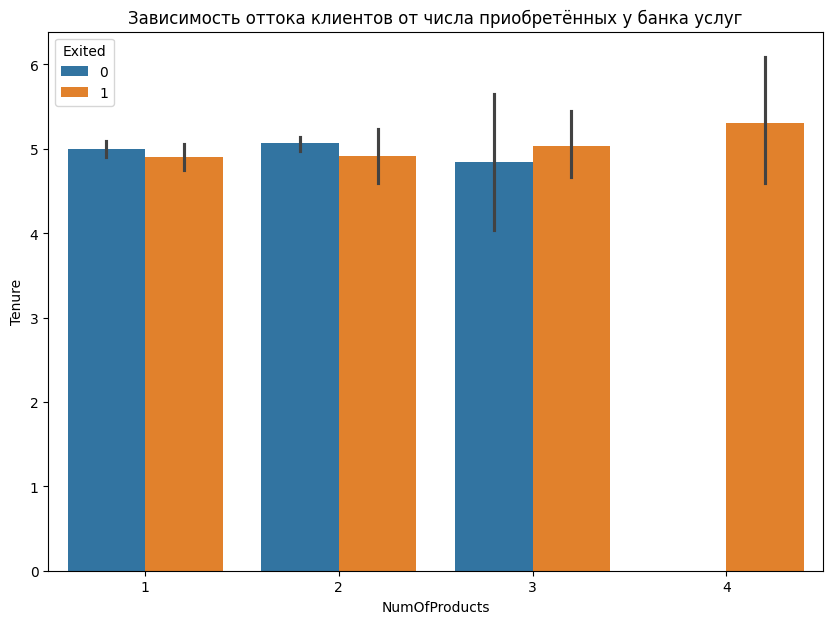

In [9]:
# Создаём многоуровневую столбчатую диаграмму, осью Ох котрой будет количество услуг банка, которые приобрёл клиент, а осью Оу -  сколько лет клиент пользуется услугами банка.
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Tenure',
    hue='Exited', # Задаём многоуровневость посредством разделения клиентов на лояльных и ушедших.
)
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг');

## Здесь мы видим, определённую зависимость оттока клиентов от числа приобретённых у банка услуг. Особенно, это видно у клиентов, чьё количество продуктов банка больше 3 - лояльных среди них нет, это указывает на возможный скудный ассортимент услуг и предложений банка для своих и клиентов и то, что последние нашли более привлекательные предложения у конкурентов.

## На основе данного графика выявляется явная необходимость в создании и/или внедрении и доработке уже имеющейся системы рекомендации продуктов в модель машинного обучения, что будет прогнозировать уход клиента, для его дальнейшего удержания.

# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

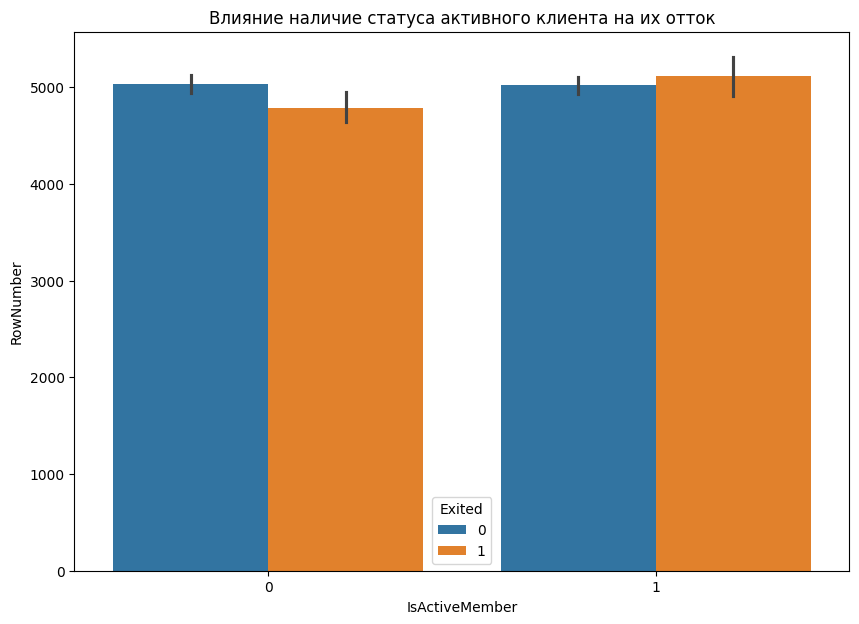

In [10]:
clients_count = churn_data['Exited'].value_counts().sum()

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='RowNumber',
    hue='Exited',
)
barplot.set_title('Влияние наличие статуса активного клиента на их отток');


## Как мы видим, данная диаграмма прекрасно показывает, что количество ушедших клиентов среди активных больше, нежели среди неактивных. Рекомендации остаются аналогичными рекомендациям из задания 9.7. - создание и/или внедрение и доработка уже имеющейся системы продвижения продуктов экосистемы банка в модель машинного обучения, что будет прогнозировать уход клиента, для его дальнейшего удержания как в банке, так и увеличения количества активных пользователей.

# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
# Создаём сводную таблицу choropleth_data, значениями которой будет доля ушедших клиентов, а столбцами - страны, которым эти доли соответствуют 
choropleth_data = churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc='mean'
)

# На основе полученной сводной таблицы создаём тепловую картограмму
fig = px.choropleth(
    data_frame=choropleth_data, # Наша сводная таблица 
    locations=choropleth_data.index, # В роли локаций будут выступать индексы столбцов choropleth_data
    locationmode = "country names", # Режим, по которому будут сопоставяться локаций с базой Plotly
    color= 'Exited', # Цвет выделения стран будет зависеть от доли ушедших клиентов 
    range_color=[0, 0.35], # Указываем диапазон цвета
    title='Доля ушедших клиентов в странах мира', # Заголовок нашей тепловой картограммы
    width=800, # Её ширина 
    height=500, # И высота 
    color_continuous_scale='Reds' # Палитра цветов - красная 
)

# Отображаем тепловую картограмму
fig.show()

## На данной тепловой картограмме мы можем наблюдать, что доля ушедших клиентов в Германии превышает 32% от всего общего числа ушедших, что говорит о том, что именно к гражданам этой страны модели машинного обучения будет необходимо обратить особое внимание. 

## Такой показатель ушедших может быть связан с особенностью государтвенных банков страны - варианты кредитования доступны для различных личных покупок, таких как транспортные средства или ремонт дома, а также льготные студенческие кредиты; многие крупные банки страны предлагают услуги в области медицинского страхования граждан, страхования жилья и т. д.; к популярным видам инвестиций в Германии относятся сберегательные счета, инвестирование в пенсионную программу и фондовый рынок Германии (Не для кого не секрет на сколько колоссальной по меркам других стран может доходить пенсия в Германии).

## Источник данных: https://www.insure.travel/de/finance/banking



# 9.10. Постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [12]:
# Переводим числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat():
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Создаём категориальный признак 'CreditScoreCat', применяя нашу функцию к столбцу 'CreditScore'
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Создаём сводную таблицу 
credit_score = round(churn_data.pivot_table(
values='Exited', # В ячейках сводной таблицы будет находиться среднее по признаку оттока (Exited) — доля ушедших пользователей
index='CreditScoreCat', # Строками которой являются категории кредитного рейтинга (CreditScoreCat)
columns='Tenure', # А столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure)
aggfunc='mean'
), 2)

# Создаём тепловую карту
fig = px.imshow(credit_score,
text_auto=True,
title = 'Тепловая карта распределения среднего значения оттока клиентов')

# Отображаем тепловую карту
fig.show()

## И так, что мы видим? Наибольшую среднюю по оттоку имеют клиенты с самым маленьким кредитным рейтингом - Very_Poor (От 300 до 500 единиц) и самой малой 'выслугой лет' банку - менее 1 года. Это отчётливо указывает нам своим ярко-жёлтым цветом на то, что у клиентов с малым количеством взятых кредитов уже возникали мысли кастально смены банка, для получения того, или иного спектра услуг.

## Как и в задании 9.7. выявляется явная необходимость в создании и/или внедрении и доработке уже имеющейся системы льготных услуг и продуктов для новых клиентов в модель машинного обучения, что будет прогнозировать уход клиента, для его дальнейшего удержания.